In [1]:
import imp
import ppsim as pp
imp.reload(pp)
from dataclasses import dataclass
import dataclasses
import numpy as np
from matplotlib import pyplot as plt
import pickle

import ipywidgets as widgets

# CRN (chemical reaction network) notation for specifying protocols



In [7]:
# CRN for approximate majority
a,b,u = pp.species('A B U')
approx_majority = [
    a+b >> 2*u,
    a+u >> 2*a,
    b+u >> 2*b,
]

 Time: 24.400


(0.0, 100000.0)

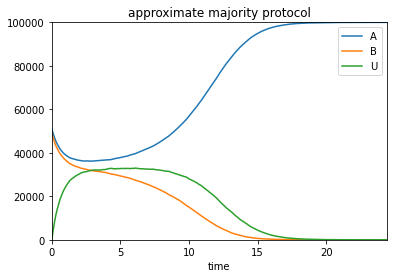

In [4]:
n = 10 ** 5
init_config = {a: 0.51*n, b: 0.49*n}
sim = pp.Simulation(init_config, approx_majority)
sim.run(history_interval=0.1)
sim.history.plot()
plt.title('approximate majority protocol')
plt.xlim(0, sim.times[-1])
plt.ylim(0, n)

# DSD oscillator 

Below is an implementation of a rock-paper-scissors (RPS) oscillator using DNA strand displacement. The "formal" CRN for the RPS oscillator is A+B &rarr; 2B, B+C &rarr; 2C, C+A &rarr; 2A. Wach reaction implemented by 8 lower-level reactions describing DNA interactions. For details, see Fig. 1 in http://dx.doi.org/10.1126/science.aal2052 (bioRxiv verion: https://www.biorxiv.org/content/10.1101/138420v2).

In [6]:
from ppsim import species
# Fig. 1 in https://www.biorxiv.org/content/10.1101/138420v2.full.pdf
# A+B --> 2B
# B+C --> 2C
# C+A --> 2A

# implementation formal species
b1, b2, c1, c2, a1, a2 = species('b1 b2 c1 c2 a1 a2')

# fuel species
react_a_b_b1, back_a_b, produce_b_b1_b2, helper_b_b2 = species('react_a_b_b1   back_a_b   produce_b_b1_b2   helper_b_b2')
react_b_c_c1, back_b_c, produce_c_c1_c2, helper_c_c2 = species('react_b_c_c1   back_b_c   produce_c_c1_c2   helper_c_c2')
react_c_a_a1, back_c_a, produce_a_a1_a2, helper_a_a2 = species('react_c_a_a1   back_c_a   produce_a_a1_a2   helper_a_a2')
    
# intermediate species
flux_b_b1, flux_c_c1, flux_a_a1 = species('flux_b_b1   flux_c_c1   flux_a_a1')
reactint_a1_b_b1, reactint_b1_c_c1, reactint_c1_a_a1 = species('reactint_a1_b_b1 reactint_b1_c_c1 reactint_c1_a_a1') 
reactint_a2_b_b1, reactint_b2_c_c1, reactint_c2_a_a1 = species('reactint_a2_b_b1 reactint_b2_c_c1 reactint_c2_a_a1') 
productint_b_b1_b2, productint_c_c1_c2, productint_a_a1_a2 = species('productint_b_b1_b2 productint_c_c1_c2 productint_a_a1_a2')
helper_b_b2, helper_c_c2, helper_a_a2 = species('helper_b_b2 helper_c_c2 helper_a_a2')

# waste species react step
waste_a1_b1, waste_a1_b2, waste_a2_b1, waste_a2_b2 = species('waste_a1_b1 waste_a1_b2 waste_a2_b1 waste_a2_b2')
waste_b1_c1, waste_b1_c2, waste_b2_c1, waste_b2_c2 = species('waste_b1_c1 waste_b1_c2 waste_b2_c1 waste_b2_c2')
waste_c1_a1, waste_c1_a2, waste_c2_a1, waste_c2_a2 = species('waste_c1_a1 waste_c1_a2 waste_c2_a1 waste_c2_a2')
# waste species product step
waste_b_b1_b2, waste_c_c1_c2, waste_a_a1_a2 = species('waste_b_b1_b2   waste_c_c1_c2   waste_a_a1_a2')

# DSD reactions implementing formal CRN
# A+B --> 2B
ab_react_rxns = [
    a1 + react_a_b_b1 | back_a_b + reactint_a1_b_b1,
    a2 + react_a_b_b1 | back_a_b + reactint_a2_b_b1,
    reactint_a1_b_b1 + b1 >> waste_a1_b1 + flux_b_b1,
    reactint_a1_b_b1 + b2 >> waste_a1_b2 + flux_b_b1,
    reactint_a2_b_b1 + b1 >> waste_a2_b1 + flux_b_b1,
    reactint_a2_b_b1 + b2 >> waste_a2_b2 + flux_b_b1,
]
ab_produce_rxns = [
    flux_b_b1 + produce_b_b1_b2 | b1 + productint_b_b1_b2,
    helper_b_b2 + productint_b_b1_b2 >> waste_b_b1_b2 + b2,
]


# B+C --> 2C


# C+A --> 2A

